# Kernel methods for machine learning - image classification challenge

## Imports

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Helper functions

In [2]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid
from sklearn.pipeline import Pipeline

### Implemented classes

In [3]:
from models import *
from utils import *

## Load data

In [4]:
Xtr = np.array(pd.read_csv('data/Xtr.csv', header=None, sep=',', usecols=range(3072)))
Xte = np.array(pd.read_csv('data/Xte.csv', header=None, sep=',', usecols=range(3072)))
Ytr = np.array(pd.read_csv('data/Ytr.csv', sep=',', usecols=[1])).squeeze()

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
Ytr

array([8, 9, 3, ..., 1, 7, 5])

## Visualization

dog


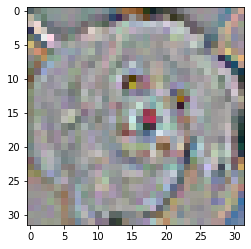

In [36]:
i = 12
show_image(X[i], classes[Yte[i]])

## Data processing

In [24]:
X, y = augment_dataset(Xtr, Ytr, ratio=1)

In [26]:
hogs = HOGExtractor().fit_transform(X)

## Training

Feature scaling:

In [8]:
scaler = StandardScaler()
Xtr_scaled = scaler.fit_transform(Xtr)

Kernel ridge regression with linear kernel:

In [ ]:
clf = KernelRidgeClassifier(kernel='linear')
start = time.time()
clf.fit(Xtr_scaled, Ytr)
end = time.time()
print(f"fit completed in {end - start:2f} seconds")

Kernel ridge regression with gaussian kernel:

In [ ]:
clf = KernelRidgeClassifier(kernel='rbf')
start = time.time()
clf.fit(Xtr_scaled, Ytr)
end = time.time()
print(f"fit completed in {end - start:2f} seconds")

In [185]:
clf = KernelRidgeClassifier(kernel='linear')
start = time.time()
clf.fit(hogs[:4000], Ytr[:4000])
end = time.time()
print(f"fit completed in {end - start:2f} seconds")

Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.10 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.05it/s]

fit completed in 5.000481 seconds


In [186]:
preds = clf.predict(hogs[4000:])
print(accuracy_score(Ytr[4000:], preds))

Predicting...


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 5662.01it/s]

0.369


Linear support vector machines:

In [31]:
clf = KernelSVC(kernel='linear', C=10)
start = time.time()
clf.fit(Xtr_scaled, Ytr)
end = time.time()
print(f"fit completed in {end - start:2f} seconds")

Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.44 seconds


  0%|                                                    | 0/10 [00:00<?, ?it/s]

     pcost       dcost       gap    pres   dres
 0: -3.5154e+03 -3.3023e+05  1e+06  8e-01  2e-11
 1: -1.2365e+03 -1.4312e+05  3e+05  2e-01  1e-11
 2: -1.3865e+02 -8.3244e+04  2e+05  1e-01  1e-11
 3:  5.9321e+02 -1.9443e+04  3e+04  2e-02  5e-12
 4:  3.0646e+02 -4.3820e+03  7e+03  3e-03  1e-12
 5:  1.3475e+02 -9.7237e+02  1e+03  5e-04  5e-13
 6:  2.8717e+01 -6.9174e+01  1e+02  5e-06  2e-13
 7: -1.8053e+00 -1.4160e+01  1e+01  7e-16  1e-13
 8: -4.7703e+00 -9.1180e+00  4e+00  2e-16  6e-14
 9: -5.7557e+00 -7.8059e+00  2e+00  3e-16  5e-14
10: -6.3222e+00 -6.9831e+00  7e-01  2e-16  5e-14
11: -6.4873e+00 -6.6086e+00  1e-01  5e-16  6e-14
12: -6.5202e+00 -6.5340e+00  1e-02  2e-16  6e-14
13: -6.5243e+00 -6.5249e+00  6e-04  6e-16  6e-14
14: -6.5245e+00 -6.5245e+00  2e-05  7e-16  6e-14


 10%|████▍                                       | 1/10 [00:32<04:48, 32.08s/it]

15: -6.5245e+00 -6.5245e+00  3e-07  2e-16  6e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6781e+03 -3.2799e+05  1e+06  8e-01  2e-11
 1: -5.3670e+02 -1.3057e+05  2e+05  2e-01  1e-11
 2:  4.7704e+02 -2.6739e+04  4e+04  2e-02  7e-12
 3:  2.2391e+02 -5.6496e+03  9e+03  4e-03  2e-12
 4:  1.0245e+02 -1.5337e+03  2e+03  1e-03  5e-13
 5:  4.1493e+01 -2.0114e+02  3e+02  7e-05  2e-13
 6:  5.6948e+00 -1.6348e+01  2e+01  7e-07  8e-14
 7: -1.0161e+00 -4.4852e+00  3e+00  4e-08  4e-14
 8: -1.7767e+00 -3.2999e+00  2e+00  1e-08  3e-14
 9: -2.1567e+00 -2.9261e+00  8e-01  2e-09  2e-14
10: -2.3377e+00 -2.5261e+00  2e-01  8e-11  3e-14
11: -2.3874e+00 -2.4128e+00  3e-02  7e-13  3e-14
12: -2.3955e+00 -2.3971e+00  2e-03  4e-14  3e-14
13: -2.3960e+00 -2.3961e+00  5e-05  1e-15  3e-14


 20%|████████▊                                   | 2/10 [01:02<04:08, 31.07s/it]

14: -2.3960e+00 -2.3960e+00  1e-06  2e-16  3e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2387e+03 -3.4164e+05  1e+06  9e-01  2e-11
 1: -8.7097e+02 -1.5568e+05  3e+05  2e-01  1e-11
 2:  1.9635e+02 -7.8207e+04  1e+05  8e-02  8e-12
 3:  7.8841e+02 -2.8423e+04  4e+04  2e-02  4e-12
 4:  4.0278e+02 -7.0493e+03  1e+04  3e-03  1e-12
 5:  1.6841e+02 -1.2287e+03  2e+03  4e-04  4e-13
 6:  3.5286e+01 -7.5278e+01  1e+02  5e-06  2e-13
 7:  7.5236e-02 -1.4027e+01  1e+01  4e-15  8e-14
 8: -3.4217e+00 -7.8346e+00  4e+00  4e-16  4e-14
 9: -4.4287e+00 -6.5759e+00  2e+00  4e-16  4e-14
10: -4.9805e+00 -5.9344e+00  1e+00  2e-16  4e-14
11: -5.1887e+00 -5.4631e+00  3e-01  6e-16  4e-14
12: -5.2573e+00 -5.2982e+00  4e-02  3e-16  4e-14
13: -5.2691e+00 -5.2709e+00  2e-03  2e-16  4e-14
14: -5.2696e+00 -5.2697e+00  6e-05  3e-16  4e-14


 30%|█████████████▏                              | 3/10 [01:35<03:44, 32.00s/it]

15: -5.2697e+00 -5.2697e+00  1e-06  2e-16  4e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.4281e+03 -3.4473e+05  1e+06  9e-01  2e-11
 1: -1.1121e+03 -1.4643e+05  3e+05  2e-01  1e-11
 2:  2.7337e+02 -6.3241e+04  1e+05  7e-02  9e-12
 3:  4.6264e+02 -1.0740e+04  2e+04  1e-02  4e-12
 4:  2.2719e+02 -2.5727e+03  4e+03  2e-03  1e-12
 5:  9.4296e+01 -5.2399e+02  7e+02  2e-04  4e-13
 6:  1.4493e+01 -4.1353e+01  6e+01  2e-06  2e-13
 7: -2.5432e+00 -1.0691e+01  8e+00  9e-08  8e-14
 8: -4.3415e+00 -7.9403e+00  4e+00  3e-08  5e-14
 9: -5.1178e+00 -7.6203e+00  3e+00  4e-16  5e-14
10: -5.5380e+00 -6.2138e+00  7e-01  2e-16  5e-14
11: -5.6867e+00 -5.7831e+00  1e-01  6e-16  5e-14
12: -5.7122e+00 -5.7208e+00  9e-03  8e-16  5e-14
13: -5.7147e+00 -5.7151e+00  4e-04  4e-16  5e-14
14: -5.7148e+00 -5.7148e+00  1e-05  2e-16  5e-14


 40%|█████████████████▌                          | 4/10 [02:07<03:12, 32.15s/it]

15: -5.7148e+00 -5.7148e+00  2e-07  3e-16  5e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2125e+03 -3.8113e+05  1e+06  1e+00  2e-11
 1: -1.0811e+03 -1.7342e+05  3e+05  2e-01  1e-11
 2:  1.9606e+02 -8.3425e+04  2e+05  9e-02  8e-12
 3:  5.3696e+02 -1.8211e+04  3e+04  2e-02  4e-12
 4:  3.0755e+02 -4.6100e+03  7e+03  3e-03  1e-12
 5:  1.4568e+02 -1.0934e+03  2e+03  5e-04  4e-13
 6:  3.2963e+01 -7.0182e+01  1e+02  5e-06  2e-13
 7:  7.2969e-02 -1.3155e+01  1e+01  6e-15  8e-14
 8: -3.1263e+00 -7.4865e+00  4e+00  1e-15  4e-14
 9: -4.2325e+00 -5.9968e+00  2e+00  2e-16  4e-14
10: -4.7004e+00 -5.3516e+00  7e-01  3e-16  4e-14
11: -4.8456e+00 -4.9514e+00  1e-01  2e-16  4e-14
12: -4.8756e+00 -4.8845e+00  9e-03  3e-16  4e-14
13: -4.8783e+00 -4.8788e+00  5e-04  2e-16  4e-14
14: -4.8785e+00 -4.8785e+00  1e-05  2e-16  4e-14


 50%|██████████████████████                      | 5/10 [02:40<02:41, 32.23s/it]

15: -4.8785e+00 -4.8785e+00  3e-07  3e-16  4e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2751e+03 -3.6516e+05  1e+06  9e-01  2e-11
 1: -1.0002e+03 -1.6615e+05  3e+05  2e-01  1e-11
 2:  2.7917e+02 -7.7373e+04  1e+05  8e-02  8e-12
 3:  4.6528e+02 -1.4160e+04  2e+04  1e-02  3e-12
 4:  2.4097e+02 -3.5680e+03  6e+03  2e-03  1e-12
 5:  1.0451e+02 -6.3231e+02  9e+02  3e-04  3e-13
 6:  2.0000e+01 -4.5059e+01  7e+01  3e-06  1e-13
 7: -9.1386e-01 -9.3358e+00  8e+00  2e-15  7e-14
 8: -2.9070e+00 -5.9107e+00  3e+00  6e-16  4e-14
 9: -3.5741e+00 -5.0040e+00  1e+00  5e-16  3e-14
10: -3.9433e+00 -4.4732e+00  5e-01  2e-16  3e-14
11: -4.0962e+00 -4.1967e+00  1e-01  2e-16  4e-14
12: -4.1250e+00 -4.1342e+00  9e-03  2e-16  3e-14
13: -4.1279e+00 -4.1283e+00  4e-04  2e-16  4e-14
14: -4.1280e+00 -4.1280e+00  1e-05  2e-16  4e-14


 60%|██████████████████████████▍                 | 6/10 [03:12<02:09, 32.28s/it]

15: -4.1280e+00 -4.1280e+00  4e-07  2e-16  4e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8818e+03 -3.1709e+05  9e+05  8e-01  2e-11
 1: -5.8073e+02 -1.2938e+05  2e+05  2e-01  1e-11
 2:  6.1051e+02 -3.0122e+04  5e+04  3e-02  7e-12
 3:  3.2035e+02 -8.6906e+03  1e+04  6e-03  2e-12
 4:  1.6044e+02 -2.1019e+03  3e+03  1e-03  5e-13
 5:  5.8200e+01 -2.5434e+02  4e+02  8e-05  2e-13
 6:  7.2776e+00 -2.1317e+01  3e+01  7e-07  8e-14
 7: -1.5280e+00 -5.8271e+00  4e+00  3e-08  4e-14
 8: -2.2766e+00 -4.7968e+00  3e+00  2e-08  3e-14
 9: -2.9672e+00 -4.2573e+00  1e+00  2e-16  3e-14
10: -3.1887e+00 -3.5985e+00  4e-01  2e-16  3e-14
11: -3.2780e+00 -3.3567e+00  8e-02  2e-16  3e-14
12: -3.3004e+00 -3.3081e+00  8e-03  2e-16  3e-14
13: -3.3029e+00 -3.3031e+00  2e-04  2e-16  3e-14
14: -3.3030e+00 -3.3030e+00  6e-06  2e-16  3e-14


 70%|██████████████████████████████▊             | 7/10 [03:44<01:36, 32.22s/it]

15: -3.3030e+00 -3.3030e+00  1e-07  2e-16  3e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.9178e+03 -3.6455e+05  1e+06  9e-01  2e-11
 1: -9.0700e+02 -1.5741e+05  3e+05  2e-01  1e-11
 2:  6.3462e+02 -3.6464e+04  6e+04  4e-02  8e-12
 3:  3.3926e+02 -7.7688e+03  1e+04  6e-03  2e-12
 4:  1.6533e+02 -2.0985e+03  3e+03  1e-03  6e-13
 5:  6.8827e+01 -3.5982e+02  5e+02  1e-04  2e-13
 6:  1.0090e+01 -2.7172e+01  4e+01  1e-06  1e-13
 7: -1.4748e+00 -6.7717e+00  5e+00  4e-08  5e-14
 8: -2.6928e+00 -4.9099e+00  2e+00  1e-08  3e-14
 9: -3.3043e+00 -4.2033e+00  9e-01  2e-09  3e-14
10: -3.4992e+00 -3.8218e+00  3e-01  2e-10  3e-14
11: -3.5741e+00 -3.6477e+00  7e-02  2e-16  3e-14
12: -3.5948e+00 -3.6035e+00  9e-03  2e-16  3e-14
13: -3.5975e+00 -3.5978e+00  3e-04  2e-16  3e-14
14: -3.5976e+00 -3.5976e+00  6e-06  2e-16  3e-14


 80%|███████████████████████████████████▏        | 8/10 [04:17<01:04, 32.30s/it]

15: -3.5976e+00 -3.5976e+00  1e-07  2e-16  3e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.3071e+03 -3.8687e+05  1e+06  1e+00  2e-11
 1: -1.1577e+03 -1.7378e+05  3e+05  2e-01  1e-11
 2:  2.6650e+02 -8.2838e+04  2e+05  9e-02  8e-12
 3:  5.5550e+02 -1.5266e+04  3e+04  1e-02  4e-12
 4:  2.9447e+02 -4.2769e+03  7e+03  3e-03  1e-12
 5:  1.2776e+02 -7.8640e+02  1e+03  4e-04  4e-13
 6:  2.5422e+01 -5.8019e+01  8e+01  3e-06  2e-13
 7: -1.3127e+00 -1.2047e+01  1e+01  4e-16  8e-14
 8: -3.9524e+00 -7.5391e+00  4e+00  1e-15  5e-14
 9: -4.7936e+00 -6.3976e+00  2e+00  2e-16  4e-14
10: -5.2235e+00 -5.7900e+00  6e-01  2e-16  4e-14
11: -5.3641e+00 -5.5259e+00  2e-01  3e-16  5e-14
12: -5.4065e+00 -5.4288e+00  2e-02  3e-16  4e-14
13: -5.4131e+00 -5.4141e+00  1e-03  2e-16  5e-14
14: -5.4134e+00 -5.4134e+00  2e-05  4e-16  5e-14


 90%|███████████████████████████████████████▌    | 9/10 [04:49<00:32, 32.40s/it]

15: -5.4134e+00 -5.4134e+00  4e-07  2e-16  5e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.7982e+03 -3.9744e+05  1e+06  1e+00  2e-11
 1: -8.8598e+02 -1.7831e+05  3e+05  2e-01  1e-11
 2:  5.9305e+02 -5.1369e+04  9e+04  5e-02  8e-12
 3:  3.3405e+02 -1.1231e+04  2e+04  9e-03  2e-12
 4:  1.5881e+02 -2.5558e+03  4e+03  2e-03  7e-13
 5:  6.7629e+01 -4.4613e+02  7e+02  2e-04  2e-13
 6:  1.4482e+01 -3.0389e+01  5e+01  2e-06  1e-13
 7: -2.0453e-01 -6.1117e+00  6e+00  2e-16  5e-14
 8: -1.5863e+00 -3.7199e+00  2e+00  2e-16  3e-14
 9: -2.1039e+00 -3.1409e+00  1e+00  2e-16  2e-14
10: -2.3613e+00 -2.7472e+00  4e-01  2e-16  2e-14
11: -2.4464e+00 -2.5416e+00  1e-01  2e-16  3e-14
12: -2.4731e+00 -2.4836e+00  1e-02  2e-16  3e-14
13: -2.4765e+00 -2.4769e+00  4e-04  2e-16  3e-14
14: -2.4766e+00 -2.4766e+00  1e-05  2e-16  3e-14


100%|███████████████████████████████████████████| 10/10 [05:22<00:00, 32.22s/it]

15: -2.4766e+00 -2.4766e+00  2e-07  2e-16  3e-14
Optimal solution found.
fit completed in 323.082908 seconds


KRR with cross-validation:

In [31]:
# on HOGs
skf = StratifiedKFold(n_splits=5, shuffle=True)
ridge = KernelRidgeClassifier(kernel='rbf')
params = {'C': [0.0005, 0.0001, 0.00005, 0.00001], 'gamma': [10, 5, 1, 0.5]}
clf = GridSearchCV(ridge, params, scoring='accuracy', cv=skf, n_jobs=4, verbose=4)
clf.fit(hogs, y)
print(clf.best_params_)
print(clf.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.46 seconds
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.48 seconds
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.59 seconds
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.59 seconds


  0%|          | 3/2000 [00:00<01:35, 20.95it/s]

Predicting...


  0%|          | 2/2000 [00:00<01:52, 17.79it/s]]

Predicting...


  1%|          | 14/2000 [00:00<01:33, 21.27it/s]

Predicting...
Predicting...


 96%|█████████▌| 1914/2000 [01:26<00:04, 20.78it/s]

[CV 1/5] END ................C=0.0005, gamma=10;, score=0.474 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.93 seconds


 99%|█████████▊| 1971/2000 [01:27<00:01, 21.17it/s]

[CV 2/5] END ................C=0.0005, gamma=10;, score=0.460 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.96 seconds


 99%|█████████▉| 1976/2000 [01:30<00:01, 19.39it/s]

[CV 3/5] END ................C=0.0005, gamma=10;, score=0.476 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.03 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 4/5] END ................C=0.0005, gamma=10;, score=0.467 total time= 3.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.17 seconds


  0%|          | 3/2000 [00:00<01:37, 20.52it/s]

Predicting...


  0%|          | 8/2000 [00:00<02:20, 14.13it/s]

Predicting...


  0%|          | 3/2000 [00:00<01:33, 21.46it/s]]

Predicting...


  4%|▎         | 72/2000 [00:04<01:31, 21.16it/s]

Predicting...


 99%|█████████▊| 1972/2000 [01:31<00:01, 21.71it/s]

[CV 1/5] END .................C=0.0005, gamma=5;, score=0.468 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.89 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 2/5] END .................C=0.0005, gamma=5;, score=0.451 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.11 seconds
[CV 5/5] END ................C=0.0005, gamma=10;, score=0.483 total time= 3.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.12 seconds


 10%|█         | 1/10 [00:07<01:11,  7.89s/it]

[CV 3/5] END .................C=0.0005, gamma=5;, score=0.480 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.29 seconds


  0%|          | 3/2000 [00:00<01:33, 21.27it/s]

Predicting...


  3%|▎         | 57/2000 [00:04<02:49, 11.43it/s]

Predicting...


  1%|          | 12/2000 [00:00<01:34, 21.05it/s]

Predicting...


  3%|▎         | 66/2000 [00:03<01:29, 21.63it/s]]

Predicting...


 98%|█████████▊| 1953/2000 [01:27<00:02, 21.79it/s]

[CV 4/5] END .................C=0.0005, gamma=5;, score=0.460 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.92 seconds


100%|█████████▉| 1998/2000 [01:30<00:00, 20.49it/s]

[CV 1/5] END .................C=0.0005, gamma=1;, score=0.559 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.98 seconds


 97%|█████████▋| 1940/2000 [01:29<00:02, 20.32it/s]

[CV 5/5] END .................C=0.0005, gamma=5;, score=0.465 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.27 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 2/5] END .................C=0.0005, gamma=1;, score=0.579 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.04 seconds


  0%|          | 3/2000 [00:00<01:37, 20.46it/s]

Predicting...


  4%|▍         | 75/2000 [00:03<01:35, 20.08it/s]

Predicting...


  1%|          | 24/2000 [00:01<01:36, 20.51it/s]

Predicting...


  0%|          | 0/2000 [00:00<?, ?it/s]

Predicting...


 95%|█████████▍| 1896/2000 [01:24<00:05, 20.60it/s]

[CV 3/5] END .................C=0.0005, gamma=1;, score=0.570 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.90 seconds



 99%|█████████▉| 1978/2000 [01:28<00:01, 19.08it/s]

[CV 4/5] END .................C=0.0005, gamma=1;, score=0.561 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.11 seconds


 99%|█████████▉| 1982/2000 [01:29<00:01, 17.59it/s]

[CV 5/5] END .................C=0.0005, gamma=1;, score=0.567 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.05 seconds


 10%|█         | 1/10 [00:07<01:06,  7.44s/it]

[CV 1/5] END ...............C=0.0005, gamma=0.5;, score=0.569 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.36 seconds


  0%|          | 3/2000 [00:00<01:35, 20.95it/s]

Predicting...


  0%|          | 3/2000 [00:00<01:33, 21.47it/s]]

Predicting...


  2%|▏         | 36/2000 [00:01<01:31, 21.50it/s]]

Predicting...


  8%|▊         | 162/2000 [00:08<01:22, 22.21it/s]

Predicting...


 92%|█████████▏| 1836/2000 [01:23<00:07, 20.58it/s]

[CV 2/5] END ...............C=0.0005, gamma=0.5;, score=0.581 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.87 seconds



 98%|█████████▊| 1958/2000 [01:29<00:02, 20.51it/s]

[CV 4/5] END ...............C=0.0005, gamma=0.5;, score=0.566 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.99 seconds


 99%|█████████▉| 1989/2000 [01:31<00:00, 19.32it/s]

[CV 3/5] END ...............C=0.0005, gamma=0.5;, score=0.574 total time= 3.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.10 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 5/5] END ...............C=0.0005, gamma=0.5;, score=0.571 total time= 3.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.31 seconds


  0%|          | 2/2000 [00:00<02:55, 11.37it/s]

Predicting...


  0%|          | 2/2000 [00:00<02:52, 11.57it/s]]

Predicting...


  3%|▎         | 54/2000 [00:04<02:49, 11.49it/s]

Predicting...


  3%|▎         | 67/2000 [00:05<01:46, 18.12it/s]]

Predicting...


 93%|█████████▎| 1857/2000 [01:25<00:06, 21.53it/s]

[CV 1/5] END ................C=0.0001, gamma=10;, score=0.474 total time= 3.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.86 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 2/5] END ................C=0.0001, gamma=10;, score=0.460 total time= 3.4min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.01 seconds


 98%|█████████▊| 1964/2000 [01:33<00:02, 17.02it/s]

[CV 3/5] END ................C=0.0001, gamma=10;, score=0.476 total time= 3.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.17 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 4/5] END ................C=0.0001, gamma=10;, score=0.467 total time= 3.4min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.33 seconds


  0%|          | 2/2000 [00:00<02:54, 11.44it/s]

Predicting...


  0%|          | 2/2000 [00:00<03:16, 10.18it/s]s]

Predicting...


  0%|          | 3/2000 [00:00<01:33, 21.34it/s]s]

Predicting...


  2%|▏         | 49/2000 [00:02<01:29, 21.86it/s]]

Predicting...


 88%|████████▊ | 1770/2000 [01:21<00:10, 21.31it/s]

[CV 5/5] END ................C=0.0001, gamma=10;, score=0.483 total time= 3.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.84 seconds


 95%|█████████▌| 1908/2000 [01:28<00:04, 20.56it/s]

[CV 1/5] END .................C=0.0001, gamma=5;, score=0.469 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.94 seconds


 97%|█████████▋| 1947/2000 [01:30<00:02, 19.94it/s]

[CV 2/5] END .................C=0.0001, gamma=5;, score=0.452 total time= 3.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.02 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 3/5] END .................C=0.0001, gamma=5;, score=0.481 total time= 3.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.29 seconds


  0%|          | 2/2000 [00:00<02:53, 11.49it/s]

Predicting...


  0%|          | 2/2000 [00:00<01:58, 16.82it/s]s]

Predicting...


  1%|          | 23/2000 [00:01<02:14, 14.66it/s]]

Predicting...


  0%|          | 3/2000 [00:00<01:33, 21.47it/s]s]

Predicting...


 92%|█████████▏| 1836/2000 [01:25<00:07, 21.24it/s]

[CV 4/5] END .................C=0.0001, gamma=5;, score=0.462 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.89 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 5/5] END .................C=0.0001, gamma=5;, score=0.468 total time= 3.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.07 seconds


 96%|█████████▌| 1913/2000 [01:30<00:05, 15.23it/s]

[CV 1/5] END .................C=0.0001, gamma=1;, score=0.592 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.31 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 2/5] END .................C=0.0001, gamma=1;, score=0.604 total time= 3.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.35 seconds


  0%|          | 3/2000 [00:00<01:35, 21.00it/s]

Predicting...


 11%|█▏        | 225/2000 [00:18<02:01, 14.61it/s]

Predicting...


 12%|█▏        | 236/2000 [00:18<01:32, 18.97it/s]

Predicting...


  5%|▌         | 107/2000 [00:04<01:24, 22.41it/s]

Predicting...


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 3/5] END .................C=0.0001, gamma=1;, score=0.597 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.91 seconds


100%|█████████▉| 1992/2000 [01:29<00:00, 19.66it/s]

[CV 5/5] END .................C=0.0001, gamma=1;, score=0.588 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.98 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 4/5] END .................C=0.0001, gamma=1;, score=0.592 total time= 3.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.26 seconds


100%|██████████| 2000/2000 [01:31<00:00, 21.92it/s]

[CV 1/5] END ...............C=0.0001, gamma=0.5;, score=0.590 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.29 seconds



  0%|          | 2/2000 [00:00<02:48, 11.88it/s]

Predicting...


  0%|          | 3/2000 [00:00<01:28, 22.62it/s]s]

Predicting...
Predicting...


  4%|▍         | 87/2000 [00:04<01:27, 21.94it/s]]

Predicting...


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 2/5] END ...............C=0.0001, gamma=0.5;, score=0.602 total time= 3.1min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.84 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 4/5] END ...............C=0.0001, gamma=0.5;, score=0.604 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.98 seconds


 97%|█████████▋| 1935/2000 [01:26<00:04, 14.65it/s]

[CV 3/5] END ...............C=0.0001, gamma=0.5;, score=0.597 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.07 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 5/5] END ...............C=0.0001, gamma=0.5;, score=0.596 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.28 seconds


  0%|          | 2/2000 [00:00<02:55, 11.40it/s]

Predicting...


  0%|          | 3/2000 [00:00<01:32, 21.60it/s]s]

Predicting...


  0%|          | 0/2000 [00:00<?, ?it/s]

Predicting...


  0%|          | 3/2000 [00:00<01:33, 21.46it/s]s]

Predicting...


 84%|████████▎ | 1674/2000 [01:15<00:14, 21.86it/s]

[CV 1/5] END .................C=5e-05, gamma=10;, score=0.474 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.84 seconds


 93%|█████████▎| 1861/2000 [01:27<00:07, 17.41it/s]

[CV 2/5] END .................C=5e-05, gamma=10;, score=0.460 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.14 seconds


 93%|█████████▎| 1869/2000 [01:28<00:08, 15.89it/s]

[CV 3/5] END .................C=5e-05, gamma=10;, score=0.476 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.31 seconds



  0%|          | 0/10 [00:00<?, ?it/s]

[CV 4/5] END .................C=5e-05, gamma=10;, score=0.467 total time= 3.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.30 seconds


  0%|          | 2/2000 [00:00<02:58, 11.19it/s]

Predicting...


 22%|██▎       | 450/2000 [00:31<01:42, 15.06it/s]

Predicting...


  0%|          | 10/2000 [00:00<01:51, 17.86it/s]]

Predicting...


  0%|          | 0/2000 [00:00<?, ?it/s]

Predicting...


 69%|██████▉   | 1379/2000 [01:04<00:29, 21.30it/s]

[CV 5/5] END .................C=5e-05, gamma=10;, score=0.483 total time= 3.1min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.83 seconds



 92%|█████████▏| 1830/2000 [01:25<00:09, 18.41it/s]

[CV 2/5] END ..................C=5e-05, gamma=5;, score=0.452 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.13 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 1/5] END ..................C=5e-05, gamma=5;, score=0.469 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.99 seconds


100%|██████████| 2000/2000 [01:38<00:00, 20.26it/s]

[CV 3/5] END ..................C=5e-05, gamma=5;, score=0.481 total time= 3.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.36 seconds



  0%|          | 0/2000 [00:00<?, ?it/s]

Predicting...


 28%|██▊       | 566/2000 [00:39<01:36, 14.87it/s]

Predicting...


  0%|          | 3/2000 [00:00<01:32, 21.49it/s]s]

Predicting...


  8%|▊         | 156/2000 [00:07<01:27, 21.12it/s]

Predicting...


 73%|███████▎  | 1460/2000 [01:05<00:25, 21.55it/s]

[CV 4/5] END ..................C=5e-05, gamma=5;, score=0.462 total time= 3.1min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.90 seconds


100%|█████████▉| 1995/2000 [01:30<00:00, 21.18it/s]

[CV 5/5] END ..................C=5e-05, gamma=5;, score=0.469 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.98 seconds



 92%|█████████▏| 1846/2000 [01:24<00:07, 19.74it/s]

[CV 1/5] END ..................C=5e-05, gamma=1;, score=0.595 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.05 seconds


100%|██████████| 2000/2000 [01:32<00:00, 21.66it/s]

[CV 2/5] END ..................C=5e-05, gamma=1;, score=0.602 total time= 3.1min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.28 seconds



  0%|          | 2/2000 [00:00<02:48, 11.85it/s]

Predicting...


 28%|██▊       | 556/2000 [00:44<01:09, 20.73it/s]

Predicting...


  2%|▏         | 42/2000 [00:03<01:42, 19.12it/s]]

Predicting...


  8%|▊         | 150/2000 [00:08<01:25, 21.67it/s]

Predicting...


 64%|██████▍   | 1281/2000 [00:56<00:33, 21.26it/s]

[CV 3/5] END ..................C=5e-05, gamma=1;, score=0.602 total time= 3.1min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.93 seconds


 94%|█████████▎| 1874/2000 [01:24<00:05, 21.28it/s]

[CV 4/5] END ..................C=5e-05, gamma=1;, score=0.601 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.92 seconds


 95%|█████████▌| 1906/2000 [01:26<00:07, 12.17it/s]

[CV 5/5] END ..................C=5e-05, gamma=1;, score=0.595 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.28 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 1/5] END ................C=5e-05, gamma=0.5;, score=0.592 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.35 seconds


  0%|          | 2/2000 [00:00<02:45, 12.11it/s]

Predicting...


  0%|          | 0/2000 [00:00<?, ?it/s]

Predicting...


 39%|███▉      | 786/2000 [00:54<00:55, 21.80it/s]

Predicting...


  8%|▊         | 153/2000 [00:07<01:23, 22.06it/s]

Predicting...


 64%|██████▎   | 1273/2000 [00:56<00:33, 21.89it/s]

[CV 2/5] END ................C=5e-05, gamma=0.5;, score=0.601 total time= 3.1min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.87 seconds


 92%|█████████▏| 1843/2000 [01:23<00:07, 21.11it/s]

[CV 3/5] END ................C=5e-05, gamma=0.5;, score=0.595 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.98 seconds


 94%|█████████▎| 1873/2000 [01:25<00:06, 19.16it/s]

[CV 4/5] END ................C=5e-05, gamma=0.5;, score=0.602 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.00 seconds


100%|██████████| 2000/2000 [01:31<00:00, 21.87it/s]

[CV 5/5] END ................C=5e-05, gamma=0.5;, score=0.601 total time= 3.1min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.34 seconds



  0%|          | 2/2000 [00:00<02:58, 11.17it/s]

Predicting...


  0%|          | 3/2000 [00:00<01:37, 20.49it/s]s]

Predicting...


 46%|████▌     | 922/2000 [01:03<01:04, 16.76it/s]

Predicting...


  0%|          | 3/2000 [00:00<01:31, 21.94it/s]s]]

Predicting...


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 1/5] END .................C=1e-05, gamma=10;, score=0.474 total time= 3.1min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.90 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 2/5] END .................C=1e-05, gamma=10;, score=0.460 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.03 seconds


 91%|█████████▏| 1829/2000 [01:29<00:11, 14.26it/s]

[CV 3/5] END .................C=1e-05, gamma=10;, score=0.476 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.03 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 4/5] END .................C=1e-05, gamma=10;, score=0.467 total time= 3.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.33 seconds


  0%|          | 2/2000 [00:00<02:51, 11.66it/s]

Predicting...


  0%|          | 2/2000 [00:00<01:42, 19.46it/s]/s]

Predicting...


 58%|█████▊    | 1160/2000 [01:20<01:02, 13.42it/s]

Predicting...


  9%|▉         | 186/2000 [00:08<01:21, 22.22it/s]]

Predicting...


 33%|███▎      | 654/2000 [00:29<01:03, 21.25it/s]

[CV 5/5] END .................C=1e-05, gamma=10;, score=0.483 total time= 3.0min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.84 seconds


  0%|          | 0/2000 [00:00<?, ?it/s]

Predicting...


  1%|          | 20/2000 [00:00<01:33, 21.22it/s]s]

[CV 1/5] END ..................C=1e-05, gamma=5;, score=0.470 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.95 seconds
[CV 2/5] END ..................C=1e-05, gamma=5;, score=0.452 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.95 seconds



  9%|▉         | 177/2000 [00:13<02:35, 11.70it/s]

[CV 3/5] END ..................C=1e-05, gamma=5;, score=0.482 total time= 3.1min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.00 seconds


 66%|██████▋   | 1329/2000 [01:38<00:58, 11.43it/s]

Predicting...


 67%|██████▋   | 1340/2000 [01:39<00:44, 14.84it/s]

Predicting...


  7%|▋         | 141/2000 [00:06<01:23, 22.18it/s]]

Predicting...


 35%|███▌      | 708/2000 [00:31<00:58, 22.04it/s]

[CV 4/5] END ..................C=1e-05, gamma=5;, score=0.463 total time= 3.0min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.89 seconds


 93%|█████████▎| 1863/2000 [01:25<00:06, 21.30it/s]

Predicting...


100%|█████████▉| 1996/2000 [01:32<00:00, 21.98it/s]

[CV 5/5] END ..................C=1e-05, gamma=5;, score=0.469 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.83 seconds


 10%|█         | 201/2000 [00:08<01:26, 20.88it/s]]

[CV 1/5] END ..................C=1e-05, gamma=1;, score=0.599 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.04 seconds


 18%|█▊        | 351/2000 [00:16<01:23, 19.75it/s]

[CV 2/5] END ..................C=1e-05, gamma=1;, score=0.608 total time= 3.1min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.98 seconds


 79%|███████▉  | 1589/2000 [01:43<00:32, 12.76it/s]

Predicting...


 81%|████████▏ | 1629/2000 [01:45<00:17, 21.73it/s]

Predicting...


  8%|▊         | 151/2000 [00:07<01:26, 21.49it/s]]

Predicting...


 22%|██▏       | 436/2000 [00:20<01:11, 21.72it/s]

[CV 3/5] END ..................C=1e-05, gamma=1;, score=0.601 total time= 3.0min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.86 seconds


  0%|          | 3/2000 [00:00<01:26, 22.99it/s]/s]

Predicting...


 94%|█████████▍| 1887/2000 [01:28<00:07, 15.50it/s]

[CV 4/5] END ..................C=1e-05, gamma=1;, score=0.601 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.97 seconds


 95%|█████████▌| 1904/2000 [01:29<00:05, 18.36it/s]

[CV 5/5] END ..................C=1e-05, gamma=1;, score=0.600 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.10 seconds


 30%|██▉       | 591/2000 [00:28<01:57, 12.00it/s]

[CV 1/5] END ................C=1e-05, gamma=0.5;, score=0.590 total time= 3.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.01 seconds


  0%|          | 0/2000 [00:00<?, ?it/s]

Predicting...


  0%|          | 0/2000 [00:00<?, ?it/s]

Predicting...


  3%|▎         | 60/2000 [00:02<01:27, 22.23it/s]s]

Predicting...


100%|██████████| 2000/2000 [01:29<00:00, 22.29it/s]

Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.14 seconds


100%|███████████████████████████████████████████| 10/10 [00:59<00:00,  5.95s/it]

{'C': 1e-05, 'gamma': 1}
0.6017


In [35]:
clf.cv_results_

{'mean_fit_time': array([103.74861245, 102.97363267, 102.99051366, 103.29763937,
        103.90078092, 102.34434924, 102.80078959, 100.35307627,
         96.44503951,  97.80430236,  95.55394483,  94.46885748,
         86.2771265 ,  88.28214536,  88.54024043,  89.12340446]),
 'std_fit_time': array([ 0.97506234,  1.04799799,  0.87632787,  1.46667516,  2.67176885,
         3.34148522,  3.68157096,  3.68593637,  5.97784013,  7.2585037 ,
         8.09543388,  9.13536099, 15.77395682, 17.54491436, 16.7983347 ,
        16.98016501]),
 'mean_score_time': array([ 89.76554246,  90.86001482,  90.7993114 ,  90.99357438,
         95.2432107 ,  92.87578678,  92.77999806,  90.93485365,
         96.02198343,  95.09483366,  94.76069975,  94.26492853,
        103.63611927,  99.24694066,  99.24639635,  97.8061902 ]),
 'std_score_time': array([ 2.22204051,  1.3449433 ,  0.93360537,  0.7843087 ,  1.46478332,
         2.53803625,  3.87655913,  2.14651659,  4.89296985,  5.51093783,
         6.78335001,  6.94

In [10]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
scaler = StandardScaler()
ridge = KernelRidgeClassifier(kernel='rbf')
pipe = Pipeline(steps=[("scaler", scaler), ("krr", ridge)])
params = {'krr__C': [0.1, 0.01], 'krr__gamma': [0.01, 0.001, 0.0001]}
clf = GridSearchCV(pipe, params, scoring='accuracy', cv=skf, n_jobs=3, verbose=4)
clf.fit(Xtr, Ytr)
print(clf.best_params_)
print(clf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.38 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.17it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.99it/s]


[CV 1/5] END .............C=5e-05, gamma=0.0005;, score=0.237 total time=  36.3s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.39 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.16it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.50it/s]


[CV 2/5] END .............C=5e-05, gamma=0.0005;, score=0.205 total time=  36.8s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.40 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.14it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.64it/s]


[CV 3/5] END .............C=5e-05, gamma=0.0005;, score=0.214 total time=  36.8s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.16it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 32.04it/s]


[CV 4/5] END .............C=5e-05, gamma=0.0005;, score=0.231 total time=  36.3s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.40 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.18it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.29it/s]


[CV 5/5] END .............C=5e-05, gamma=0.0005;, score=0.250 total time=  37.0s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.47 seconds


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.73it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:32<00:00, 30.58it/s]


[CV 1/5] END .............C=5e-05, gamma=0.0001;, score=0.235 total time=  39.0s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.42 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.02it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.99it/s]


[CV 2/5] END .............C=5e-05, gamma=0.0001;, score=0.195 total time=  36.7s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.36 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.19it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 32.23it/s]


[CV 3/5] END .............C=5e-05, gamma=0.0001;, score=0.210 total time=  36.0s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.82it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.74it/s]


[CV 4/5] END .............C=5e-05, gamma=0.0001;, score=0.214 total time=  37.4s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.20it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:30<00:00, 32.45it/s]


[CV 5/5] END .............C=5e-05, gamma=0.0001;, score=0.223 total time=  35.8s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.19it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:30<00:00, 32.85it/s]


[CV 1/5] END ..............C=5e-05, gamma=5e-05;, score=0.217 total time=  35.4s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.36 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.16it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:30<00:00, 32.31it/s]


[CV 2/5] END ..............C=5e-05, gamma=5e-05;, score=0.186 total time=  36.0s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.21it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:30<00:00, 32.34it/s]


[CV 3/5] END ..............C=5e-05, gamma=5e-05;, score=0.197 total time=  35.9s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.36 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.13it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:32<00:00, 31.02it/s]


[CV 4/5] END ..............C=5e-05, gamma=5e-05;, score=0.204 total time=  37.4s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.36 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.10it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.45it/s]


[CV 5/5] END ..............C=5e-05, gamma=5e-05;, score=0.203 total time=  37.0s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.39 seconds


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.90it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.67it/s]


[CV 1/5] END .............C=1e-05, gamma=0.0005;, score=0.244 total time=  37.3s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.06it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 32.06it/s]


[CV 2/5] END .............C=1e-05, gamma=0.0005;, score=0.208 total time=  36.5s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.41 seconds


100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.64it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:32<00:00, 30.73it/s]


[CV 3/5] END .............C=1e-05, gamma=0.0005;, score=0.215 total time=  39.1s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.44 seconds


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.86it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:32<00:00, 31.20it/s]


[CV 4/5] END .............C=1e-05, gamma=0.0005;, score=0.223 total time=  38.0s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.38 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.08it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 32.04it/s]


[CV 5/5] END .............C=1e-05, gamma=0.0005;, score=0.255 total time=  36.5s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.38 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.00it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.32it/s]


[CV 1/5] END .............C=1e-05, gamma=0.0001;, score=0.229 total time=  37.4s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.09it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:32<00:00, 30.48it/s]


[CV 2/5] END .............C=1e-05, gamma=0.0001;, score=0.192 total time=  38.0s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.74it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.36it/s]


[CV 3/5] END .............C=1e-05, gamma=0.0001;, score=0.196 total time=  38.1s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.64it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.27it/s]


[CV 4/5] END .............C=1e-05, gamma=0.0001;, score=0.222 total time=  38.5s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.44 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.19it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.61it/s]


[CV 5/5] END .............C=1e-05, gamma=0.0001;, score=0.224 total time=  36.7s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.39 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.02it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.48it/s]


[CV 1/5] END ..............C=1e-05, gamma=5e-05;, score=0.215 total time=  37.2s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.17it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 32.16it/s]


[CV 2/5] END ..............C=1e-05, gamma=5e-05;, score=0.186 total time=  36.1s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.11it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.28it/s]


[CV 3/5] END ..............C=1e-05, gamma=5e-05;, score=0.191 total time=  37.1s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.48 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.09it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.86it/s]


[CV 4/5] END ..............C=1e-05, gamma=5e-05;, score=0.202 total time=  36.7s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.19it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 32.03it/s]


[CV 5/5] END ..............C=1e-05, gamma=5e-05;, score=0.206 total time=  36.2s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.18it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.64it/s]


[CV 1/5] END .............C=5e-06, gamma=0.0005;, score=0.244 total time=  36.6s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.15it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.71it/s]


[CV 2/5] END .............C=5e-06, gamma=0.0005;, score=0.209 total time=  36.6s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.14it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.46it/s]


[CV 3/5] END .............C=5e-06, gamma=0.0005;, score=0.218 total time=  36.9s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.41 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.15it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.63it/s]


[CV 4/5] END .............C=5e-06, gamma=0.0005;, score=0.224 total time=  36.7s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.11it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 32.25it/s]


[CV 5/5] END .............C=5e-06, gamma=0.0005;, score=0.253 total time=  36.2s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.36 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.09it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.82it/s]


[CV 1/5] END .............C=5e-06, gamma=0.0001;, score=0.222 total time=  36.6s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.36 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.13it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:30<00:00, 32.52it/s]


[CV 2/5] END .............C=5e-06, gamma=0.0001;, score=0.196 total time=  35.9s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.18it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:30<00:00, 32.54it/s]


[CV 3/5] END .............C=5e-06, gamma=0.0001;, score=0.200 total time=  35.7s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.36 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.20it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 32.22it/s]


[CV 4/5] END .............C=5e-06, gamma=0.0001;, score=0.217 total time=  36.0s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.06it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.44it/s]


[CV 5/5] END .............C=5e-06, gamma=0.0001;, score=0.227 total time=  37.1s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.08it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:30<00:00, 32.29it/s]


[CV 1/5] END ..............C=5e-06, gamma=5e-05;, score=0.210 total time=  36.2s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.06it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:30<00:00, 32.46it/s]


[CV 2/5] END ..............C=5e-06, gamma=5e-05;, score=0.186 total time=  36.1s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.36 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.12it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 32.15it/s]


[CV 3/5] END ..............C=5e-06, gamma=5e-05;, score=0.186 total time=  36.3s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.37 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.06it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 32.25it/s]


[CV 4/5] END ..............C=5e-06, gamma=5e-05;, score=0.210 total time=  36.3s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.36 seconds


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.14it/s]


Predicting...


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.43it/s]


[CV 5/5] END ..............C=5e-06, gamma=5e-05;, score=0.210 total time=  36.9s
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.56 seconds


100%|███████████████████████████████████████████| 10/10 [00:08<00:00,  1.12it/s]

{'C': 5e-06, 'gamma': 0.0005}
0.22959999999999997


SVM with cross-validation:

In [9]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
scaler = StandardScaler()
svm = KernelSVC(kernel='rbf')
pipe = Pipeline(steps=[("scaler", scaler), ("svm", svm)])
params = {'svm__C': [10000, 1000], 'svm__gamma': [0.01, 0.001, 0.0001]}
clf = GridSearchCV(pipe, params, scoring='accuracy', cv=skf, n_jobs=3, verbose=4)
clf.fit(Xtr, Ytr)
print(clf.best_params_)
print(clf.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.91 seconds
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.93 seconds
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.94 seconds


  0%|          | 3/1000 [00:00<00:40, 24.43it/s]

Predicting...


  8%|▊         | 77/1000 [00:03<00:40, 22.69it/s]

Predicting...


  3%|▎         | 28/1000 [00:01<00:34, 28.04it/s]

Predicting...


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 3/5] END .....svm__C=10000, svm__gamma=0.01;, score=0.114 total time= 6.8min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.67 seconds
[CV 2/5] END .....svm__C=10000, svm__gamma=0.01;, score=0.109 total time= 6.8min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.64 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 1/5] END .....svm__C=10000, svm__gamma=0.01;, score=0.107 total time= 6.8min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.01 seconds


  0%|          | 2/1000 [00:00<01:08, 14.63it/s]

Predicting...


  0%|          | 4/1000 [00:00<00:32, 30.80it/s]s]

Predicting...


  0%|          | 0/1000 [00:00<?, ?it/s]

Predicting...


 94%|█████████▍| 940/1000 [00:32<00:02, 28.82it/s]

[CV 5/5] END .....svm__C=10000, svm__gamma=0.01;, score=0.105 total time= 6.8min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.53 seconds


 42%|████▏     | 416/1000 [00:13<00:21, 26.78it/s]

[CV 4/5] END .....svm__C=10000, svm__gamma=0.01;, score=0.108 total time= 6.9min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.76 seconds


100%|██████████| 1000/1000 [00:39<00:00, 25.15it/s]

[CV 1/5] END ....svm__C=10000, svm__gamma=0.001;, score=0.144 total time= 7.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 1.14 seconds



  0%|          | 2/1000 [00:00<01:07, 14.74it/s]

Predicting...


  0%|          | 0/1000 [00:00<?, ?it/s]

Predicting...


  0%|          | 0/1000 [00:00<?, ?it/s]

Predicting...


 57%|█████▊    | 575/1000 [00:17<00:14, 30.23it/s]]

[CV 2/5] END ....svm__C=10000, svm__gamma=0.001;, score=0.151 total time= 7.4min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.46 seconds


 61%|██████    | 606/1000 [00:19<00:15, 26.18it/s]

[CV 3/5] END ....svm__C=10000, svm__gamma=0.001;, score=0.145 total time= 7.4min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.59 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 4/5] END ....svm__C=10000, svm__gamma=0.001;, score=0.143 total time= 7.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.97 seconds


  0%|          | 2/1000 [00:00<01:16, 12.98it/s]

Predicting...


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 5/5] END ....svm__C=10000, svm__gamma=0.001;, score=0.143 total time= 7.7min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.99 seconds


  0%|          | 2/1000 [00:00<01:06, 14.97it/s]

Predicting...


 36%|███▌      | 360/1000 [00:17<00:26, 23.94it/s]

Predicting...


 67%|██████▋   | 667/1000 [00:24<00:12, 26.29it/s]

[CV 1/5] END ...svm__C=10000, svm__gamma=0.0001;, score=0.113 total time= 8.5min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.75 seconds


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 2/5] END ...svm__C=10000, svm__gamma=0.0001;, score=0.116 total time= 8.5min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.90 seconds


KeyboardInterrupt: 

In [201]:
# on HOGs
skf = StratifiedKFold(n_splits=5, shuffle=True)
svm = KernelSVC(kernel='linear')
params = {'C': [10, 1, 0.1]}
clf = GridSearchCV(svm, params, scoring='accuracy', cv=skf, n_jobs=3, verbose=4)
clf.fit(hogs, Ytr)
print(clf.best_params_)
print(clf.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


  0%|          | 0/10 [00:00<?, ?it/s]

Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.09 seconds
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.11 seconds
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.13 seconds


 13%|█▎        | 129/1000 [00:00<00:00, 1287.71it/s]

Predicting...


100%|██████████| 1000/1000 [00:00<00:00, 1843.40it/s]

[CV 1/5] END ..............................C=10;, score=0.100 total time= 8.2min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.12 seconds



 16%|█▌        | 160/1000 [00:00<00:00, 1593.94it/s]

Predicting...


100%|██████████| 1000/1000 [00:00<00:00, 2321.69it/s]

[CV 3/5] END ..............................C=10;, score=0.100 total time= 8.4min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.07 seconds



 23%|██▎       | 231/1000 [00:00<00:00, 2305.32it/s]

Predicting...


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 2/5] END ..............................C=10;, score=0.100 total time= 8.6min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.11 seconds


 18%|█▊        | 177/1000 [00:00<00:00, 1764.37it/s]

Predicting...


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 4/5] END ..............................C=10;, score=0.100 total time= 8.3min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.11 seconds


 11%|█         | 106/1000 [00:00<00:00, 1056.07it/s]

Predicting...


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 1/5] END ...............................C=1;, score=0.100 total time= 8.0min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.11 seconds


 41%|████▏     | 413/1000 [00:00<00:00, 4129.17it/s]

Predicting...


100%|██████████| 1000/1000 [00:00<00:00, 3383.77it/s]

[CV 5/5] END ..............................C=10;, score=0.100 total time= 8.4min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.09 seconds



 18%|█▊        | 185/1000 [00:00<00:00, 1848.17it/s]

Predicting...


100%|██████████| 1000/1000 [00:00<00:00, 2036.36it/s]

[CV 2/5] END ...............................C=1;, score=0.100 total time= 7.7min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.07 seconds



 34%|███▍      | 343/1000 [00:00<00:00, 3427.15it/s]

Predicting...


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 3/5] END ...............................C=1;, score=0.100 total time= 8.0min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.09 seconds


 30%|███       | 305/1000 [00:00<00:00, 3046.93it/s]

Predicting...


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 4/5] END ...............................C=1;, score=0.100 total time= 8.0min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.13 seconds


 20%|██        | 201/1000 [00:00<00:00, 2000.82it/s]

Predicting...


100%|██████████| 1000/1000 [00:00<00:00, 1934.58it/s]

[CV 5/5] END ...............................C=1;, score=0.100 total time= 7.7min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.11 seconds



 17%|█▋        | 172/1000 [00:00<00:00, 1716.36it/s]

Predicting...


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 1/5] END .............................C=0.1;, score=0.100 total time= 7.6min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.10 seconds


 20%|██        | 203/1000 [00:00<00:00, 2028.35it/s]

Predicting...


  0%|          | 0/10 [00:00<?, ?it/s]

[CV 2/5] END .............................C=0.1;, score=0.100 total time= 7.6min
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.10 seconds


 25%|██▍       | 249/1000 [00:00<00:00, 2486.54it/s]

Predicting...


 37%|███▋      | 370/1000 [00:00<00:00, 3693.87it/s]

Predicting...


100%|██████████| 1000/1000 [00:00<00:00, 9097.76it/s]

Predicting...
Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.11 seconds


 60%|██████████████████████████▍                 | 6/10 [04:15<03:03, 45.95s/it]

[CV 3/5] END .............................C=0.1;, score=0.100 total time= 7.5min


[CV 4/5] END .............................C=0.1;, score=0.100 total time= 7.5min


[CV 5/5] END .............................C=0.1;, score=0.100 total time= 7.4min



100%|███████████████████████████████████████████| 10/10 [06:56<00:00, 41.68s/it]

{'C': 10}
0.1


## Predict and export

In [113]:
Xte_scaled = scaler.transform(Xte)

In [32]:
hog_test = HOGExtractor().fit_transform(Xte)

In [33]:
start = time.time()
Yte = clf.predict(hog_test)
end = time.time()
print(f"predict completed in {end - start:.2f} seconds")

Predicting...


100%|███████████████████████████████████████| 2000/2000 [02:15<00:00, 14.79it/s]

predict completed in 135.24 seconds


In [34]:
clf.best_estimator_

KernelRidgeClassifier(C=1e-05, gamma=1)

In [36]:
Yte = {'Prediction' : Yte}
dataframe = pd.DataFrame(Yte)
dataframe.index += 1
dataframe.to_csv('Yte_pred_krr_rbf_C0.00001_gamma1_hog_aug1.csv', index_label='Id')

[CV 2/5] END ................C=1e-05, gamma=0.5;, score=0.595 total time= 3.0min


[CV 3/5] END ................C=1e-05, gamma=0.5;, score=0.598 total time= 3.1min


[CV 4/5] END ................C=1e-05, gamma=0.5;, score=0.598 total time= 3.2min


[CV 5/5] END ................C=1e-05, gamma=0.5;, score=0.599 total time= 3.1min


## Tests

In [11]:
from sklearn.datasets import make_classification
from sklearn.linear_model import RidgeClassifier

In [ ]:
X, y = make_classification(n_informative=5, n_classes=10)
y

In [ ]:
clf = KernelRidgeClassifier(kernel='linear')
clf.fit(X, y)
clf.predict(X)

In [ ]:
clf.K.similarity_matrix()

In [ ]:
clf = RidgeClassifier(fit_intercept=False)
clf.fit(X, Ytr)
Yte = clf.predict(Xte_scaled)

### Comparison for regression

In [7]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.datasets import make_regression

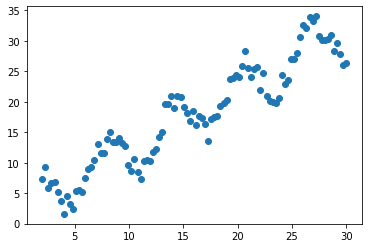

In [8]:
x = np.linspace(2,30,100)
y= x + 4*np.sin(x)+ 4*np.random.rand(x.shape[0])
plt.scatter(x, y)
plt.show()

In [9]:
C = 0.01
gamma = 10

In [10]:
x = StandardScaler().fit_transform(x.reshape(-1,1))[:,0]
reg = KernelRidgeRegressor(C=C/len(x), kernel='rbf', gamma=gamma)
reg.fit(x.reshape(-1,1), y)
x_pred=np.arange(0,35,0.2)
x_pred = StandardScaler().fit_transform(x_pred.reshape(-1, 1))[:,0]
y_pred = reg.predict(x_pred)

Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.00 seconds
Predicting...


100%|██████████| 175/175 [00:00<00:00, 1428.10it/s]


In [11]:
reg2 = KernelRidge(alpha=C, kernel='rbf', gamma=gamma)
reg2.fit(x.reshape(-1,1), y)
y_pred2 = reg2.predict(x_pred.reshape(-1,1))

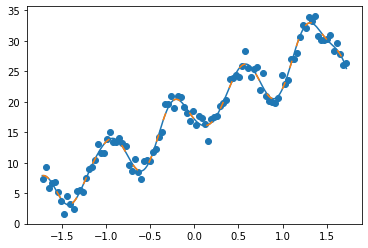

In [12]:
plt.scatter(x, y)
plt.plot(x_pred, y_pred)
plt.plot(x_pred, y_pred2, linestyle=(0, (5, 10)))
plt.show()

In our implementation, regularization is multiplied by the number of training examples. Fixing the regularization factor, its behavior is the same as sklearn's KernelRidge if the value is divided by the number of examples. It is also important to standardize.

In [13]:
X, y = make_regression(n_samples=1000, n_features=500)
#X = StandardScaler().fit_transform(X)

reg1 = KernelRidgeRegressor(C=C/len(X), kernel='rbf', gamma=gamma)
reg1.fit(X, y)
y_pred1 = reg1.predict(X)

reg2 = KernelRidge(alpha=C, kernel='rbf', gamma=gamma)
reg2.fit(X, y)
y_pred2 = reg2.predict(X)

Start computing kernel similarity matrix...
Kernel similarity matrix computed in 0.14 seconds
Predicting...


100%|██████████| 1000/1000 [00:07<00:00, 132.03it/s]


In [14]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y, y_pred1))
print(mean_squared_error(y, y_pred2))

3.096179128528922
3.096179128528922
